In [413]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [394]:
data = pd.read_csv('./data/restaurant_turnover_training.csv')
data['Comfortability'] = data['Comfortablility']
data = data.drop(columns=['Comfortablility', "Registration Number"])

In [395]:
len(data.columns)

33

In [396]:
data.isnull().sum().sort_values(ascending=False)

Live Sports Rating               3288
Value Deals Rating               2707
Comedy Gigs Rating               2483
Live Music Rating                 765
Overall Restaurant Rating         212
Facebook Popularity Quotient       99
Instagram Popularity Quotient      56
Resturant Tier                     49
Ambience                           25
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Annual Turnover                     0
Order Wait Time                     0
Lively                              0
Service                             0
Privacy                             0
Staff Responsivness                 0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Cuisine                             0
Restaurant Theme                    0
Restaurant Type                     0
Open Sitting Available              0
Dedicated Parking                   0
Situated in a Multi Complex         0
Liquor Licen

In [424]:
for col in ["Live Sports Rating", "Live Music Rating", "Comedy Gigs Rating", "Value Deals Rating"]:
    data["has"+col] = (~data[col].isnull()).astype("int64")

KeyError: 'Live Sports Rating'

In [423]:
imputer = SimpleImputer(strategy="median")
imputer.fit(data[[x for x in data if x not in cat_col]])
imputer.transform(data)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'no'

In [398]:
data=data.dropna(axis="columns")
len(data.columns)

28

In [399]:
data.isnull().sum().sort_values(ascending=False)

Annual Turnover                0
Cuisine                        0
hasComedy Gigs Rating          0
hasLive Music Rating           0
hasLive Sports Rating          0
Comfortability                 0
Privacy                        0
Service                        0
Lively                         0
Food Rating                    0
Hygiene Rating                 0
Value for Money                0
Staff Responsivness            0
Order Wait Time                0
Restaurant City Tier           0
Restaurant Zomato Rating       0
Restaurant Theme               0
Restaurant Type                0
Open Sitting Available         0
Dedicated Parking              0
Situated in a Multi Complex    0
Liquor License Obtained        0
Fire Audit                     0
Endorsed By                    0
Opening Day of Restaurant      0
Restaurant Location            0
City                           0
hasValue Deals Rating          0
dtype: int64

In [400]:
for datatype in ["float64", "int64", "O"]:
    print(datatype)
    print(pd.Series(data.dtypes[data.dtypes.apply(lambda x: x==datatype)].index))

float64
Series([], dtype: object)
int64
0                 Annual Turnover
1                      Fire Audit
2         Liquor License Obtained
3     Situated in a Multi Complex
4               Dedicated Parking
5          Open Sitting Available
6        Restaurant Zomato Rating
7            Restaurant City Tier
8                 Order Wait Time
9             Staff Responsivness
10                Value for Money
11                 Hygiene Rating
12                    Food Rating
13                         Lively
14                        Service
15                        Privacy
16                 Comfortability
dtype: object
O
0                      Cuisine
1                         City
2          Restaurant Location
3    Opening Day of Restaurant
4                  Endorsed By
5              Restaurant Type
6             Restaurant Theme
dtype: object


In [401]:
cat_col = list(data.dtypes[data.dtypes.apply(lambda x: x=="O")].index)
for c in cat_col:
    print(c)
    print(pd.Series(data[c].unique()), "\n\n")

Cuisine
0            indian,irish
1         tibetan,italian
2        turkish,nigerian
3           irish,belgian
4           tibetan,greek
5     chinese,salvadorian
6        algerian,belgian
7              welsh,thai
8          peruvian,cuban
9           japanese,thai
10       british,japanese
11         nigerian,cajun
12      algerian,algerian
13          polish,jewish
14          cuban,british
15        algerian,korean
16          swedish,greek
17        turkish,sapnish
18        british,belgian
19       hawaiian,latvian
dtype: object 


City
0      Bangalore
1         Indore
2        Chennai
3        Gurgaon
4        Manesar
         ...    
292        bihar
293    singaruli
294       KANPUR
295    Banglore 
296        pondy
Length: 297, dtype: object 


Restaurant Location
0    Near Business Hub
1       Near Party Hub
dtype: object 


Opening Day of Restaurant
0       14-02-2009
1       29-09-2008
2       30-07-2011
3       30-11-2008
4       22-02-2010
           ...    
1773    27

There are some data cleaning tasks to do for the categorical variables...capitalization, splitting into two columns, and datetime. Also, there's an idea to already feed it learned information on what the restaurant theme words mean.

<AxesSubplot:xlabel='Privacy', ylabel='Count'>

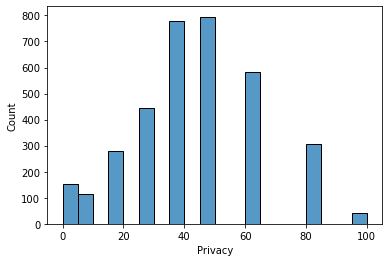

In [402]:
sns.histplot(np.square(data["Privacy"]))

Annual Turnover


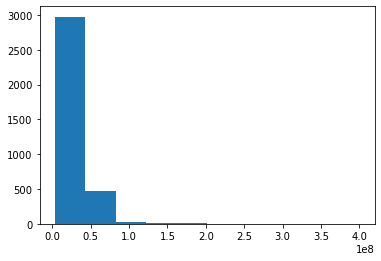

Restaurant Zomato Rating


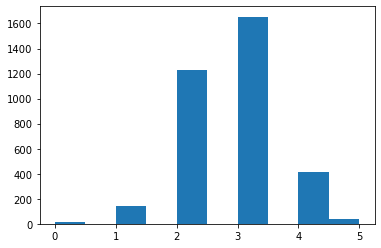

Order Wait Time


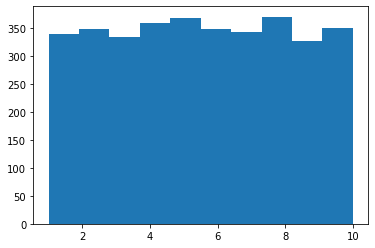

Staff Responsivness


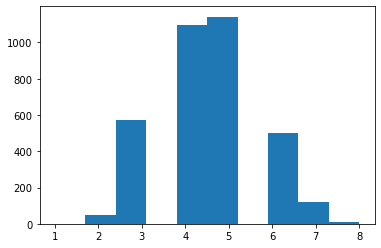

Value for Money


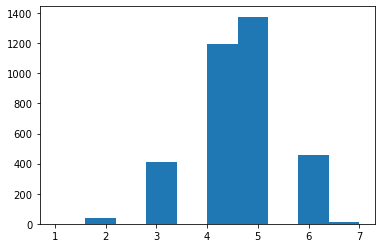

Hygiene Rating


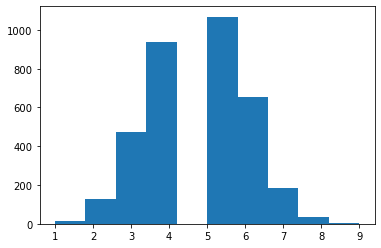

Food Rating


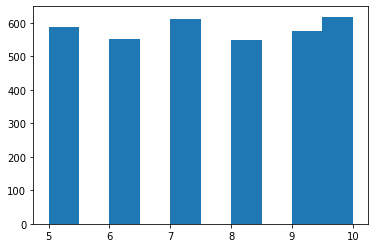

Lively


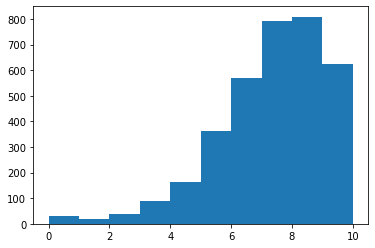

Service


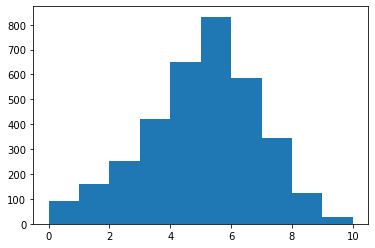

Privacy


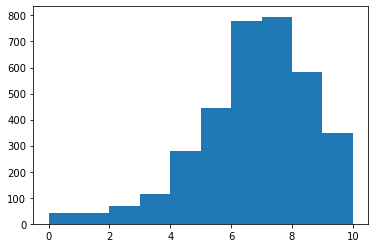

Comfortability


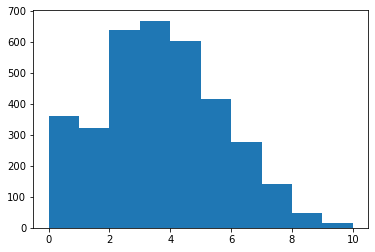

In [403]:
int_col = list(data.dtypes[data.dtypes.apply(lambda x: x=="int64")].index)
for c in int_col:
    if len(data[c].value_counts()) <= 2:
        data[c] = data[c].astype('category')
        continue
    print(c)
    plt.hist(data[c])
    plt.show()

In [404]:
int_col = list(data.dtypes[data.dtypes.apply(lambda x: x=="int64")].index)

In [405]:
data['Restaurant Zomato Rating'].max()

5

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order Wait Time'>

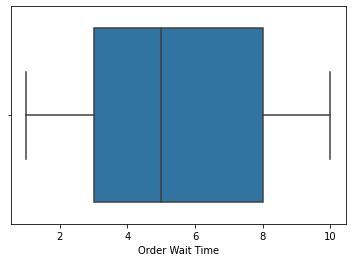

In [406]:
sns.boxplot(data['Order Wait Time'])

In [407]:
data["log_Annual Turnover"] = np.log(data["Annual Turnover"])
data["square_Lively"] = np.square(data["Lively"])
data["square_Privacy"] = np.square(data["Privacy"])
data["log_Comfortability"] = np.log(5+data["Comfortability"])
data = data.drop(columns=["Annual Turnover", "Lively"])
# sns.pairplot(randata[["Annual Turnover", "Facebook Popularity Quotient", "Instagram Popularity Quotient"]])

In [408]:
data.corr()

,Restaurant Zomato Rating,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Service,Privacy,Comfortability,log_Annual Turnover,square_Lively,square_Privacy,log_Comfortability
Restaurant Zomato Rating,1.000000,-0.000871,0.118990,0.175547,0.205512,0.016918,-0.009764,0.041965,-0.085560,0.186923,0.091894,0.036697,-0.081301
Order Wait Time,-0.000871,1.000000,0.011599,-0.007479,-0.006227,-0.016510,-0.025671,-0.009726,-0.012320,0.009711,-0.010167,-0.012139,-0.012808
Staff Responsivness,0.118990,0.011599,1.000000,0.411549,0.356265,-0.003087,0.012477,0.057677,-0.143064,0.235229,0.175202,0.041876,-0.146372
Value for Money,0.175547,-0.007479,0.411549,1.000000,0.475350,-0.018981,-0.002434,0.044321,-0.157119,0.229903,0.150099,0.028986,-0.159571
Hygiene Rating,0.205512,-0.006227,0.356265,0.475350,1.000000,-0.016447,-0.024494,0.015707,-0.142005,0.331148,0.097453,0.001286,-0.141220
Food Rating,0.016918,-0.016510,-0.003087,-0.018981,-0.016447,1.000000,0.018998,0.034002,-0.004703,0.000220,0.005879,0.042820,-0.006467
Service,-0.009764,-0.025671,0.012477,-0.002434,-0.024494,0.018998,1.000000,0.402005,-0.097890,-0.010431,0.409358,0.381095,-0.111878
Privacy,0.041965,-0.009726,0.057677,0.044321,0.015707,0.034002,0.402005,1.000000,-0.075540,-0.001283,0.503672,0.968808,-0.086127
Comfortability,-0.085560,-0.012320,-0.143064,-0.157119,-0.142005,-0.004703,-0.097890,-0.075540,1.000000,-0.096047,-0.228057,-0.078062,0.989242
log_Annual Turnover,0.186923,0.009711,0.235229,0.229903,0.331148,0.000220,-0.010431,-0.001283,-0.096047,1.000000,0.075286,-0.018258,-0.089429


In [409]:
X = data.drop(columns=[*cat_col, "log_Annual Turnover", "Order Wait Time", "Food Rating"])
y = data["log_Annual Turnover"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [411]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 2036 to 3281
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Fire Audit                   1048 non-null   category
 1   Liquor License Obtained      1048 non-null   category
 2   Situated in a Multi Complex  1048 non-null   category
 3   Dedicated Parking            1048 non-null   category
 4   Open Sitting Available       1048 non-null   category
 5   Restaurant Zomato Rating     1048 non-null   int64   
 6   Restaurant City Tier         1048 non-null   category
 7   Staff Responsivness          1048 non-null   int64   
 8   Value for Money              1048 non-null   int64   
 9   Hygiene Rating               1048 non-null   int64   
 10  Service                      1048 non-null   int64   
 11  Privacy                      1048 non-null   int64   
 12  Comfortability               1048 non-null   int64   
 13  

In [412]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
model.score(X_test, y_test)

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'